#  Task 1: Create a Car Parking Prediction Model 

## Description:
In this, you need to find the Car Park Distance Prediction for Smart Vehicles. Most of the parking lots around the world make sure that the cars are parked in parallel. However many people face difficulties when it comes to parallel parking, especially due to various assumptions one has to make regarding spatial arrangements. A machine learning algorithm needs to be implemented to calculate whether the car would be able to successfully park in the cavity or not, based on the distances measured by the sensor.

## Approach: 
Since there is no relevant dataset on the internet, we have to create our own synthetic dataset. The synthetic dataset contains 3 columns. The description of features is as followed: 
1. `Car_Size` : The length of the car in meters.
2. `Parking_Space` : The space available (in meters) for the car to be parked as detected by the sensor in the smart car.
3. `Output` : This is the output feature (binary). `0` indicates that car can not be parked in the available space. `1` indicates that car can be parked in the given space.

    More relevant features can also be added in the dataset like whether the car supports power-cutting ability and other relevant specifications of the car in order to make accurate predictions. But for now to keep the model simple, we will be considering only `Car_Size` and `Parking_Space` as input features.

We will be creating a classifier from scratch using *Tensorflow* (Neural Networks using Keras) and then use *TensorFlow Lite* to convert the normal ML model into a  Tiny ML Model (compressed form) which can then be embedded on devices with less memory like micro-controllers or egde devices.
In our case this Tiny ML Model can be loaded into the micro-controller in the smart car which takes the input from the sensors installed in the car, processes the input and generates the relevant output

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_excel('Car_Parking.xlsx', header = 0)
df.head()

,Car_Size,Parking_Space,Output
0,4.00,5.0,1
1,5.13,5.0,0
2,5.27,6.1,1
3,4.34,4.5,0
4,4.50,6.0,1


<AxesSubplot:xlabel='Car_Size', ylabel='Parking_Space'>

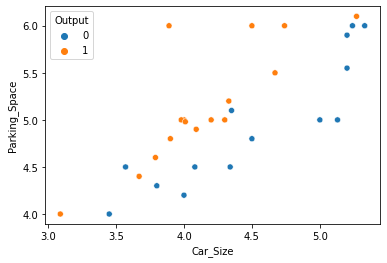

In [3]:
# Plotting the scatter plot of Car_Size vs Parking_Space
sns.scatterplot(x = df['Car_Size'], y = df['Parking_Space'], hue = 'Output', data = df)

In [4]:
df.shape

(30, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Size       30 non-null     float64
 1   Parking_Space  30 non-null     float64
 2   Output         30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
# Loading the x AND y features
x = df.drop('Output', axis = 1)
y = df['Output']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.05),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
#We kept track of loss, accuracy, precision, and recall during training, and saved them to history. 
#We can now visualize these metrics to get a sense of how the model is doing
history = model.fit(X_train_scaled, y_train, epochs=10)

C:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 1s 996ms/step - loss: 0.7615 - accuracy: 0.4583 - precision: 0.5000 - recall: 0.8462
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5570 - accuracy: 0.7083 - precision: 0.8000 - recall: 0.6154
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8750 - precision: 0.8571 - recall: 0.9231
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.9583 - precision: 0.9286 - recall: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9583 - precision: 0.9286 - recall: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9583 - precision: 0.9286 - recall: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1480 - accuracy: 0.9583 - precision: 0.9286 - recall: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - los

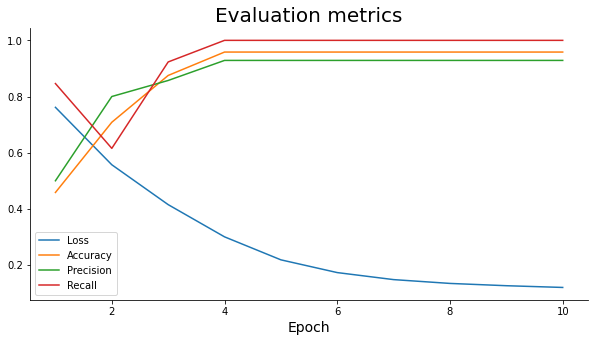

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 11), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 11), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 11), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 11), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [10]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('car_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\AMOGH GARG\AppData\Local\Temp\tmp935heenk\assets


The model can further be improved if we are able to provide as input a more comprehensive dataset. Also, more layers can be added to neural-network, but since the dataset is small as of now we are not adding more layers to avoid over-fitting.

`car_model.tflite` can be loaded and used for inference with the help of following documentation: [Inference Guide](https://www.tensorflow.org/lite/guide/inference)

*Inference refers to the process of executing a TensorFlow Lite model on-device to make predictions based on input data.*

## Submitted By: Amogh Garg (2020UCO1688)